In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
results_base = os.path.join(os.environ['HOME'], 'fits/uoineuro/cur')
monkeys = os.listdir(results_base)
monkeys.sort()
results_paths = [os.path.join(results_base, file) for file in monkeys if 'indy' in file]

In [3]:
results_paths

['/home/psachdeva/fits/uoineuro/cur/indy_20160407_02.h5',
 '/home/psachdeva/fits/uoineuro/cur/indy_20160411_01.h5',
 '/home/psachdeva/fits/uoineuro/cur/indy_20160411_02.h5',
 '/home/psachdeva/fits/uoineuro/cur/indy_20160418_01.h5',
 '/home/psachdeva/fits/uoineuro/cur/indy_20160420_01.h5',
 '/home/psachdeva/fits/uoineuro/cur/indy_20160426_01.h5']

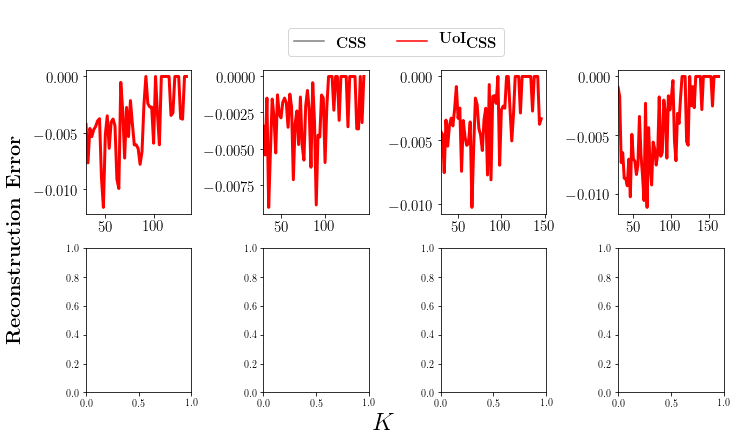

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))

for idx, ax in enumerate(axes.ravel()[:]):
    results = h5py.File(results_paths[idx], 'r')
    uoi_reconstructions = results['uoi/reconstructions']
    css_reconstructions = results['css/reconstructions']
    ranks = 30 + 2 * np.arange(uoi_reconstructions.shape[1])
    ax.plot(ranks, np.mean(uoi_reconstructions, axis=0), color='red', linewidth=3)
    ax.plot(ranks, np.mean(css_reconstructions, axis=0), color='gray', linewidth=3)
    
    ax.set_xlim(left=30)
    ax.tick_params(labelsize=15)

    
fig.text(
    x=0.5, y=-0.01, s=r'$K$', fontsize=25,
    horizontalalignment='center',
    verticalalignment='center'
)

fig.text(
    x=-0.01, y=0.5, s=r'\textbf{Reconstruction Error}', fontsize=20,
    horizontalalignment='center',
    verticalalignment='center',
    rotation=90
)

ax.plot([], [], color='gray', label=r'\textbf{CSS}')
ax.plot([], [], color='r', label=r'\textbf{UoI}$_{\textbf{CSS}}$')

fig.legend(
    loc='lower center',
    ncol=2,
    bbox_to_anchor=(0.55, 1.05),
    prop={'size': 15}
)

plt.tight_layout()
# plt.savefig('css_reconstruction.pdf', bbox_inches='tight')

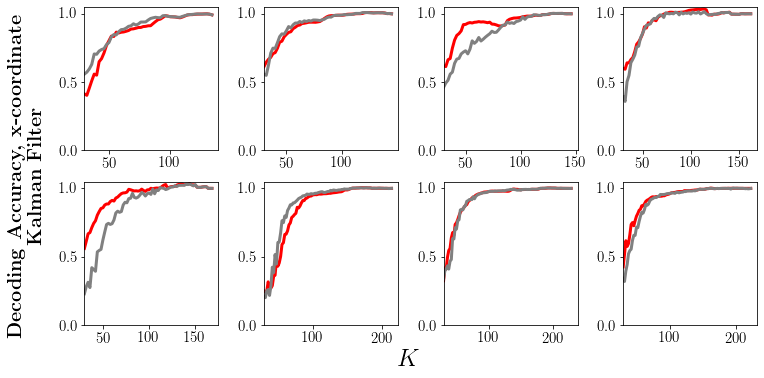

In [75]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))

for idx, ax in enumerate(axes.ravel()):
    results = h5py.File(results_paths[idx], 'r')
    base_scores = results['base_scores'][:]
    uoi_scores = results['uoi/scores/kalman_scores'][:]
    css_scores = results['css/scores/kalman_scores'][:]

    ranks = 30 + 2 * np.arange(uoi_scores.shape[1])
    ax.plot(ranks, np.mean(uoi_scores, axis=0)[:, 0] / base_scores[0], color='red', linewidth=3)
    ax.plot(ranks, np.mean(css_scores, axis=0)[:, 0] / base_scores[0], color='gray', linewidth=3)

    ax.set_xlim(left=30)
    ax.set_ylim([0, 1.05])
    
    ax.tick_params(labelsize=15)

    
fig.text(
    x=0.5, y=-0.01, s=r'$K$', fontsize=25,
    horizontalalignment='center',
    verticalalignment='center'
)

fig.text(
    x=-0.03, y=0.5, s=r'\textbf{Decoding Accuracy, x-coordinate}' '\n' r'\textbf{Kalman Filter}', fontsize=20,
    horizontalalignment='center',
    verticalalignment='center',
    rotation=90
)


plt.tight_layout()
plt.savefig('css_decoding_x_kalman.pdf', bbox_inches='tight')

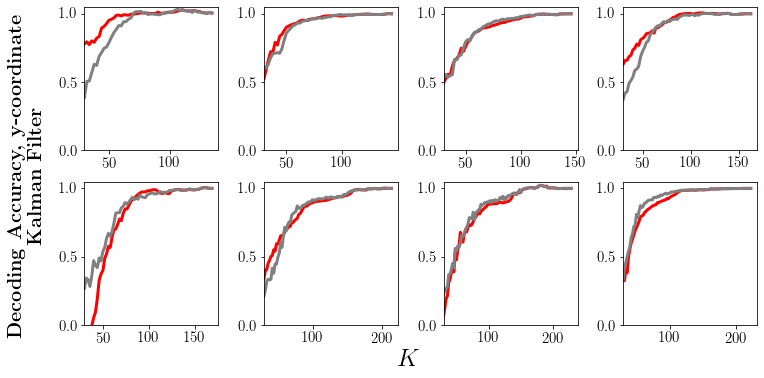

In [76]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))

for idx, ax in enumerate(axes.ravel()):
    results = h5py.File(results_paths[idx], 'r')
    base_scores = results['base_scores'][:]
    uoi_scores = results['uoi/scores/kalman_scores'][:]
    css_scores = results['css/scores/kalman_scores'][:]

    ranks = 30 + 2 * np.arange(uoi_scores.shape[1])
    ax.plot(ranks, np.mean(uoi_scores, axis=0)[:, 1] / base_scores[1], color='red', linewidth=3)
    ax.plot(ranks, np.mean(css_scores, axis=0)[:, 1] / base_scores[1], color='gray', linewidth=3)

    ax.set_xlim(left=30)
    ax.set_ylim([0, 1.05])
    
    ax.tick_params(labelsize=15)

    
fig.text(
    x=0.5, y=-0.01, s=r'$K$', fontsize=25,
    horizontalalignment='center',
    verticalalignment='center'
)

fig.text(
    x=-0.03, y=0.5, s=r'\textbf{Decoding Accuracy, y-coordinate}' '\n' r'\textbf{Kalman Filter}', fontsize=20,
    horizontalalignment='center',
    verticalalignment='center',
    rotation=90
)


plt.tight_layout()
plt.savefig('css_decoding_y_kalman.pdf', bbox_inches='tight')

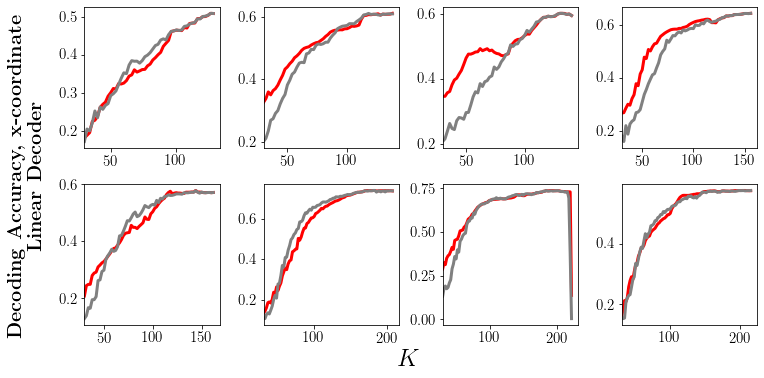

In [77]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))

for idx, ax in enumerate(axes.ravel()):
    results = h5py.File(results_paths[idx], 'r')
    uoi_scores = results['uoi/scores/linear_scores'][:]
    css_scores = results['css/scores/linear_scores'][:]

    ranks = 30 + 2 * np.arange(uoi_scores.shape[1])
    ax.plot(ranks[:-3], np.mean(uoi_scores[:, :-3], axis=0)[:, 0], color='red', linewidth=3)
    ax.plot(ranks[:-3], np.mean(css_scores[:, :-3], axis=0)[:, 0], color='gray', linewidth=3)
    
    ax.set_xlim(left=30)
    
    ax.tick_params(labelsize=15)

    
fig.text(
    x=0.5, y=-0.01, s=r'$K$', fontsize=25,
    horizontalalignment='center',
    verticalalignment='center'
)

fig.text(
    x=-0.03, y=0.5, s=r'\textbf{Decoding Accuracy, x-coordinate}' '\n' r'\textbf{Linear Decoder}', fontsize=20,
    horizontalalignment='center',
    verticalalignment='center',
    rotation=90
)


plt.tight_layout()
plt.savefig('css_decoding_x_linear.pdf', bbox_inches='tight')

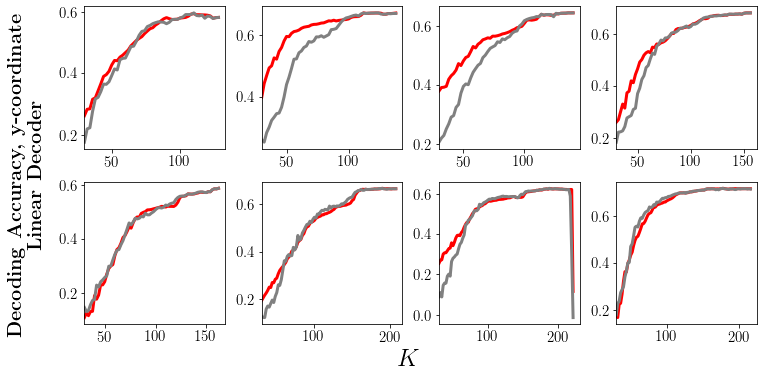

In [78]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))

for idx, ax in enumerate(axes.ravel()):
    results = h5py.File(results_paths[idx], 'r')
    uoi_scores = results['uoi/scores/linear_scores'][:]
    css_scores = results['css/scores/linear_scores'][:]
    
    ranks = 30 + 2 * np.arange(uoi_scores.shape[1])
    ax.plot(ranks[:-3], np.mean(uoi_scores[:, :-3], axis=0)[:, 1], color='red', linewidth=3)
    ax.plot(ranks[:-3], np.mean(css_scores[:, :-3], axis=0)[:, 1], color='gray', linewidth=3)
    
    ax.set_xlim(left=30)

    ax.tick_params(labelsize=15)

    
fig.text(
    x=0.5, y=-0.01, s=r'$K$', fontsize=25,
    horizontalalignment='center',
    verticalalignment='center'
)

fig.text(
    x=-0.03, y=0.5, s=r'\textbf{Decoding Accuracy, y-coordinate}' '\n' r'\textbf{Linear Decoder}', fontsize=20,
    horizontalalignment='center',
    verticalalignment='center',
    rotation=90
)

plt.tight_layout()
plt.savefig('css_decoding_y_linear.pdf', bbox_inches='tight')